In [51]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal


In [52]:
nyse_dates = mcal.get_calendar('NYSE')
nyse_dates = list(nyse_dates.valid_days(start_date='2022-01-01', end_date='2030-02-12'))
nyse_dates = [dt.date() for dt in nyse_dates]

nyse_dates

[datetime.date(2022, 1, 3),
 datetime.date(2022, 1, 4),
 datetime.date(2022, 1, 5),
 datetime.date(2022, 1, 6),
 datetime.date(2022, 1, 7),
 datetime.date(2022, 1, 10),
 datetime.date(2022, 1, 11),
 datetime.date(2022, 1, 12),
 datetime.date(2022, 1, 13),
 datetime.date(2022, 1, 14),
 datetime.date(2022, 1, 18),
 datetime.date(2022, 1, 19),
 datetime.date(2022, 1, 20),
 datetime.date(2022, 1, 21),
 datetime.date(2022, 1, 24),
 datetime.date(2022, 1, 25),
 datetime.date(2022, 1, 26),
 datetime.date(2022, 1, 27),
 datetime.date(2022, 1, 28),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2),
 datetime.date(2022, 2, 3),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 2, 7),
 datetime.date(2022, 2, 8),
 datetime.date(2022, 2, 9),
 datetime.date(2022, 2, 10),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 14),
 datetime.date(2022, 2, 15),
 datetime.date(2022, 2, 16),
 datetime.date(2022, 2, 17),
 datetime.date(2022, 2, 18),
 datetime.date(2022, 2, 22

In [53]:
def next_market_day(date):
    while date.date() not in nyse_dates:
        date += datetime.timedelta(days=1)
    return date

In [54]:
df = pd.read_excel("WIW Data.xlsx")
df = df.iloc[:, :-3]


df


,Ticker (Equities/ETFs only),"Position (Long = 1, Short = -1)"
0,SIX,-1
1,DISH,-1
2,PLNT,1
3,MMM,-1
4,NFLX,-1
...,...,...
190,TMUS,1
191,TSM,1
192,SBUX,-1
193,NOW,1


In [55]:
df = df.dropna()

df = df[df['Exit Date'] <= datetime.datetime(2024, 2, 9)]

# Step 3: Convert the date column to datetime if it's not already
df["Entry Date"] = df["Entry Date"].apply(next_market_day)
df["Exit Date"] = df["Exit Date"].apply(next_market_day)

df = df[df['Exit Date'] > df['Entry Date']]

unique_symbols = df['Ticker (Equities/ETFs only)'].unique()
unique_symbols


KeyError: 'Exit Date'

In [ ]:
stock_history = {}

start_date = '2022-01-01'
end_date = '2024-02-10'

for symbol in unique_symbols:
    print(symbol)
    stock = yf.download(symbol, start=start_date, end=end_date)

    if len(stock > 0):
        stock.index = stock.index.date
        stock_history[symbol] = stock


SIX
[*********************100%%**********************]  1 of 1 completed
DISH
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



PLNT
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MMM
[*********************100%%**********************]  1 of 1 completed
NFLX
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



RKLB
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



FIVE
[*********************100%%**********************]  1 of 1 completed
EL
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ORLY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



RUN
[*********************100%%**********************]  1 of 1 completed
VECO
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



UHS
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



V
[*********************100%%**********************]  1 of 1 completed
RTX
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MCD
[*********************100%%**********************]  1 of 1 completed
NTDOY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GLBE
[*********************100%%**********************]  1 of 1 completed
GOOG


C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



NUE
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



TR
[*********************100%%**********************]  1 of 1 completed
MSFT
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



SLDP
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GOOGL
[*********************100%%**********************]  1 of 1 completed
SBUX
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



NVDA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



LVMUY
[*********************100%%**********************]  1 of 1 completed
DDOG
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



PERI
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



VRRM
[*********************100%%**********************]  1 of 1 completed
RH
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



FARO
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



DVN
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MAR
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ONON
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GOLF
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



EA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



XOM
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CRK
[*********************100%%**********************]  1 of 1 completed
FFZ3
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

1 Failed download:
['FFZ3']: Exception('%ticker%: No timezone found, symbol may be delisted')



CMBX
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMBX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2024-02-10)')



DME
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2024-02-10)')



DE


C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  1 of 1 completed
WFC
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ADSK
[*********************100%%**********************]  1 of 1 completed
ICE:DXY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')

1 Failed download:
['ICE:DXY']: Exception('%ticker%: No timezone found, symbol may be delisted')



SHOP
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MU
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



TPC
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



LUV
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



WTI
[*********************100%%**********************]  1 of 1 completed
VLD
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



U
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



AMZN
[*********************100%%**********************]  1 of 1 completed
UBER
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



CROX
[*********************100%%**********************]  1 of 1 completed
ALGN
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



PLTR
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



AAPL
[*********************100%%**********************]  1 of 1 completed
TSN


C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



MRNA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



HPE
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



SYM
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



ALB
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



UAA
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



BTC
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



WOLF
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



GLD
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



SRS
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



LMT
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



SNY
[*********************100%%**********************]  1 of 1 completed

C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



KR
[*********************100%%**********************]  1 of 1 completed


C:\Users\surya\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [ ]:
stock_history['AAPL']

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724548,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443588,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723572,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840256,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008133,86709100
...,...,...,...,...,...,...
2024-02-05,188.149994,189.250000,185.839996,187.679993,187.440811,69668800
2024-02-06,186.860001,189.309998,186.770004,189.300003,189.058762,43490800
2024-02-07,190.639999,191.050003,188.610001,189.410004,189.168625,53439000
2024-02-08,189.389999,189.539993,187.350006,188.320007,188.080017,40962000


In [ ]:
spy_data = pd.read_csv("SPY.csv")
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
spy_data['Date'] = spy_data['Date'].dt.date


type(spy_data['Date'][0])
# spy_data

datetime.date

In [ ]:
df = df[df['Ticker (Equities/ETFs only)'].isin(stock_history.keys())]

entry_prices = []
exit_prices = []
spy_entry_prices = []
spy_exit_prices = []

for index, row in df.iterrows():
    ticker = row['Ticker (Equities/ETFs only)']
    entry_date = row['Entry Date'].date()
    exit_date = row['Exit Date'].date()

    ticker_history = stock_history[ticker]

    entry_prices.append(ticker_history.at[entry_date, 'Adj Close'])
    exit_prices.append(ticker_history.at[exit_date, 'Adj Close'])

    spy_entry_prices.append(spy_data.loc[spy_data['Date'] == entry_date]['Adj Close'].iloc[0])
    spy_exit_prices.append(spy_data.loc[spy_data['Date'] == exit_date]['Adj Close'].iloc[0])

df['entry_price'] = entry_prices
df['exit_price'] = exit_prices
df['spy_entry_price'] = spy_entry_prices
df['spy_exit_price'] = spy_exit_prices


In [ ]:
df

,Ticker (Equities/ETFs only),"Position (Long = 1, Short = -1)",Entry Date,Exit Date,"Negative Alumni Response (No response/not negative = 0, Negative = 1)",entry_price,exit_price,spy_entry_price,spy_exit_price
0,SIX,-1.0,2022-11-07,2023-04-06,0.0,21.160000,25.420000,372.550964,404.602264
1,DISH,-1.0,2022-11-07,2023-11-06,0.0,14.670000,3.435000,372.550964,433.930664
2,PLNT,1.0,2022-11-08,2023-05-08,0.0,66.919998,72.019997,374.561066,408.112457
3,MMM,-1.0,2022-11-08,2023-01-09,0.0,116.835907,119.561882,374.561066,382.053284
4,NFLX,-1.0,2022-11-09,2023-05-09,1.0,254.660004,332.140015,366.844330,406.322754
...,...,...,...,...,...,...,...,...,...
143,LMT,-1.0,2023-11-06,2024-02-05,0.0,447.966492,421.700012,433.930664,492.549988
144,SNY,1.0,2023-11-06,2024-01-04,0.0,45.240002,51.009998,433.930664,467.279999
146,KR,-1.0,2023-11-06,2024-02-06,0.0,44.863567,44.990002,433.930664,493.980011
150,SBUX,-1.0,2023-11-13,2023-12-26,0.0,102.890961,95.097847,438.412506,475.649994


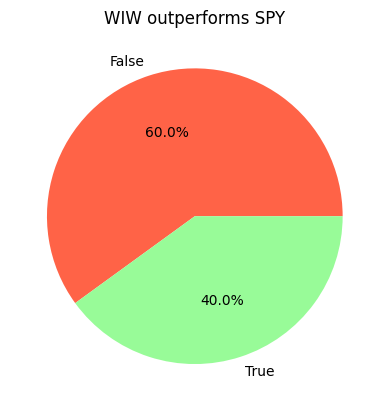

In [ ]:
df['stock_growth'] = (df['Position (Long = 1, Short = -1)']) * ((df['exit_price'] - df['entry_price']) / df['entry_price']) * 100
df['spy_growth'] = ((df['spy_exit_price'] - df['spy_entry_price']) / df['spy_entry_price']) * 100
df['outperformed'] = df['stock_growth'] > df['spy_growth']

outperformed_counts = df['outperformed'].value_counts()

colors = ['tomato', 'palegreen']
labels = ['False', 'True']

plt.pie(outperformed_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('WIW outperforms SPY')

plt.show()


,Ticker (Equities/ETFs only),"Position (Long = 1, Short = -1)",Entry Date,Exit Date,"Negative Alumni Response (No response/not negative = 0, Negative = 1)",entry_price,exit_price,spy_entry_price,spy_exit_price,stock_growth,spy_growth
0,SIX,-1.0,2022-11-07,2023-04-06,0.0,21.160000,25.420000,372.550964,404.602264,-20.132326,8.603199
1,DISH,-1.0,2022-11-07,2023-11-06,0.0,14.670000,3.435000,372.550964,433.930664,76.584868,16.475518
2,PLNT,1.0,2022-11-08,2023-05-08,0.0,66.919998,72.019997,374.561066,408.112457,7.621038,8.957522
3,MMM,-1.0,2022-11-08,2023-01-09,0.0,116.835907,119.561882,374.561066,382.053284,-2.333165,2.000266
4,NFLX,-1.0,2022-11-09,2023-05-09,1.0,254.660004,332.140015,366.844330,406.322754,-30.424884,10.761629
...,...,...,...,...,...,...,...,...,...,...,...
143,LMT,-1.0,2023-11-06,2024-02-05,0.0,447.966492,421.700012,433.930664,492.549988,5.863492,13.508915
144,SNY,1.0,2023-11-06,2024-01-04,0.0,45.240002,51.009998,433.930664,467.279999,12.754192,7.685406
146,KR,-1.0,2023-11-06,2024-02-06,0.0,44.863567,44.990002,433.930664,493.980011,-0.281820,13.838466
150,SBUX,-1.0,2023-11-13,2023-12-26,0.0,102.890961,95.097847,438.412506,475.649994,7.574148,8.493710
